In [33]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

In [3]:
df = pd.read_csv('data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns = 'id', inplace = True)

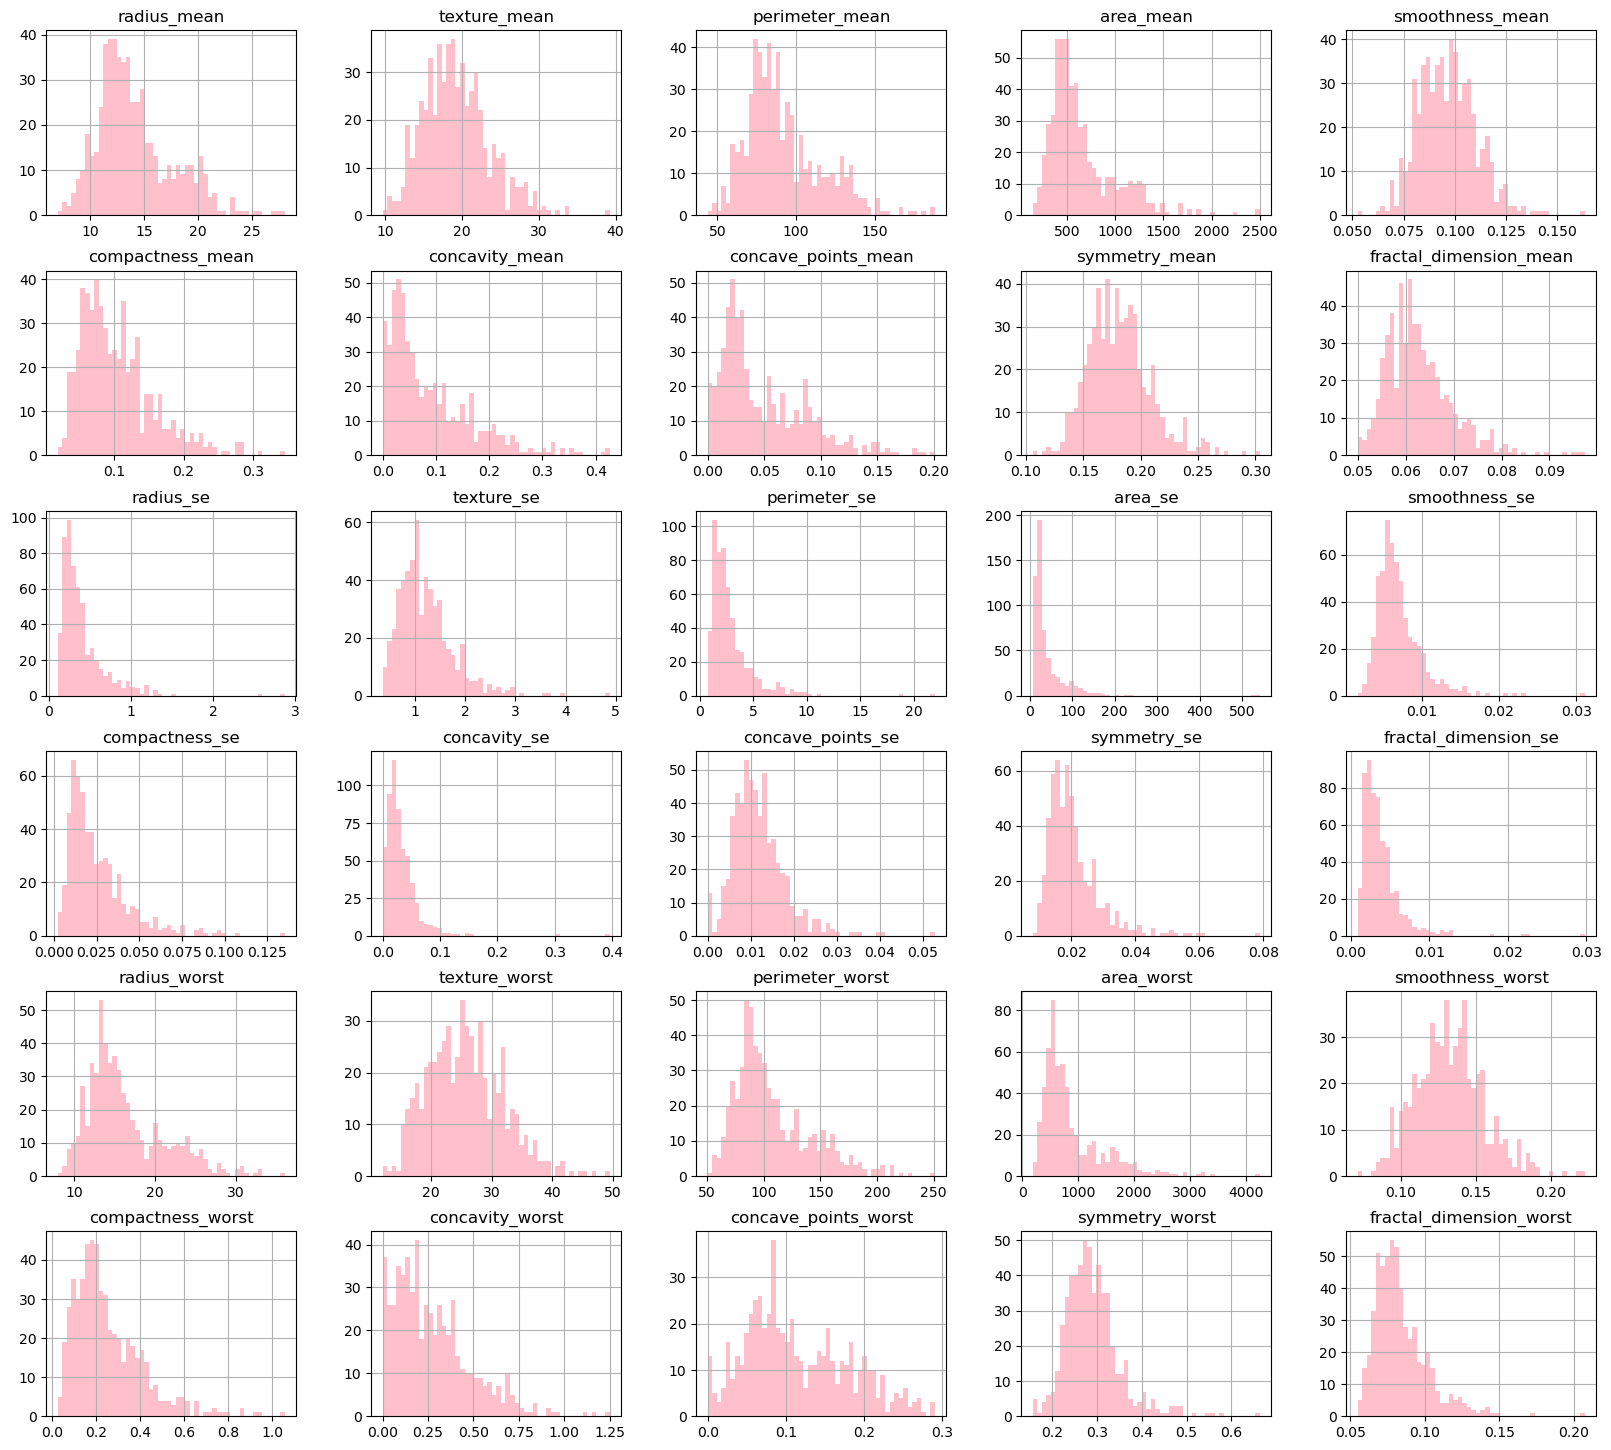

In [9]:
df.hist(bins = 50, figsize = (20, 18), color = 'pink');

In [23]:
# df_baru = []
def outlier(data):
    columns = df.select_dtypes(include = ['int', 'float']).columns
    outlier_counts = {}
    for x in columns:
        Q1 = data[x].quantile(0.25)
        Q3 = data[x].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q1 + 1.5 * IQR 
        outliers = data[(data[x] < lower_bound) | (data[x] > upper_bound)]
        outlier_counts[x] = len(outliers)

    return outlier_counts

outlier_counts = outlier(df)
print(f'jumlah data outlier : {outlier_counts}')

jumlah data outlier : {'radius_mean': 98, 'texture_mean': 65, 'perimeter_mean': 92, 'area_mean': 101, 'smoothness_mean': 59, 'compactness_mean': 77, 'concavity_mean': 74, 'concave_points_mean': 57, 'symmetry_mean': 66, 'fractal_dimension_mean': 73, 'radius_se': 91, 'texture_se': 74, 'perimeter_se': 88, 'area_se': 105, 'smoothness_se': 82, 'compactness_se': 77, 'concavity_se': 67, 'concave_points_se': 67, 'symmetry_se': 79, 'fractal_dimension_se': 79, 'radius_worst': 88, 'texture_worst': 51, 'perimeter_worst': 84, 'area_worst': 96, 'smoothness_worst': 61, 'compactness_worst': 62, 'concavity_worst': 74, 'concave_points_worst': 55, 'symmetry_worst': 71, 'fractal_dimension_worst': 78}


In [22]:
def remove_outlier(data):
    columns = data.select_dtypes(include = ['int', 'float']).columns
    cleaned_data = data.copy() #membuat salinan dataframe untuk menghindari perubahan pada data asli
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q1 + 1.5 * IQR 
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
    return cleaned_data

df_cleaned = remove_outlier(df)

In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 10 to 548
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                214 non-null    object 
 1   radius_mean              214 non-null    float64
 2   texture_mean             214 non-null    float64
 3   perimeter_mean           214 non-null    float64
 4   area_mean                214 non-null    float64
 5   smoothness_mean          214 non-null    float64
 6   compactness_mean         214 non-null    float64
 7   concavity_mean           214 non-null    float64
 8   concave_points_mean      214 non-null    float64
 9   symmetry_mean            214 non-null    float64
 10  fractal_dimension_mean   214 non-null    float64
 11  radius_se                214 non-null    float64
 12  texture_se               214 non-null    float64
 13  perimeter_se             214 non-null    float64
 14  area_se                  214 n

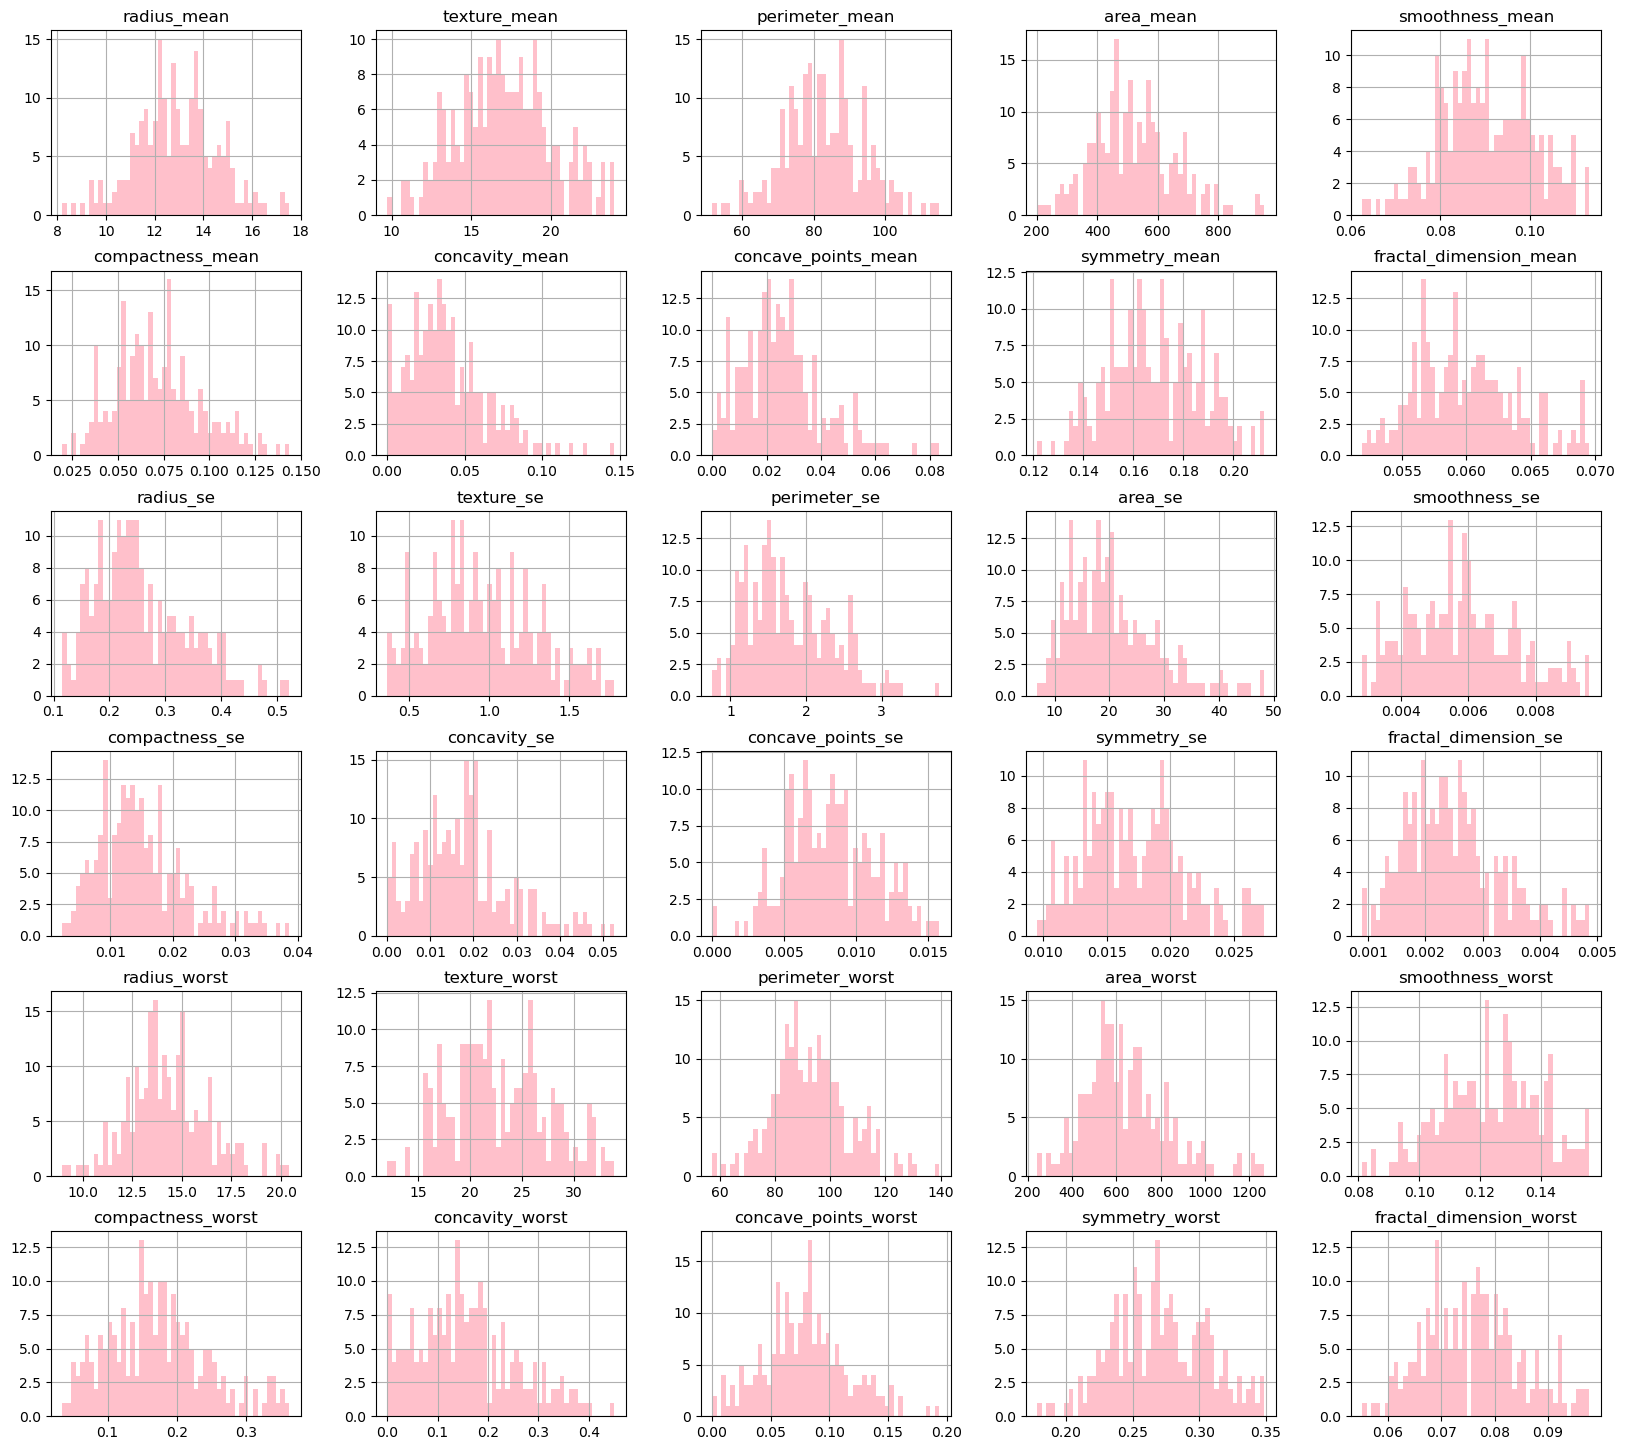

In [17]:
df_cleaned.hist(bins = 50, figsize = (20, 18), color = 'pink'); 

<Axes: title={'center': 'Correlation Between Variables'}>

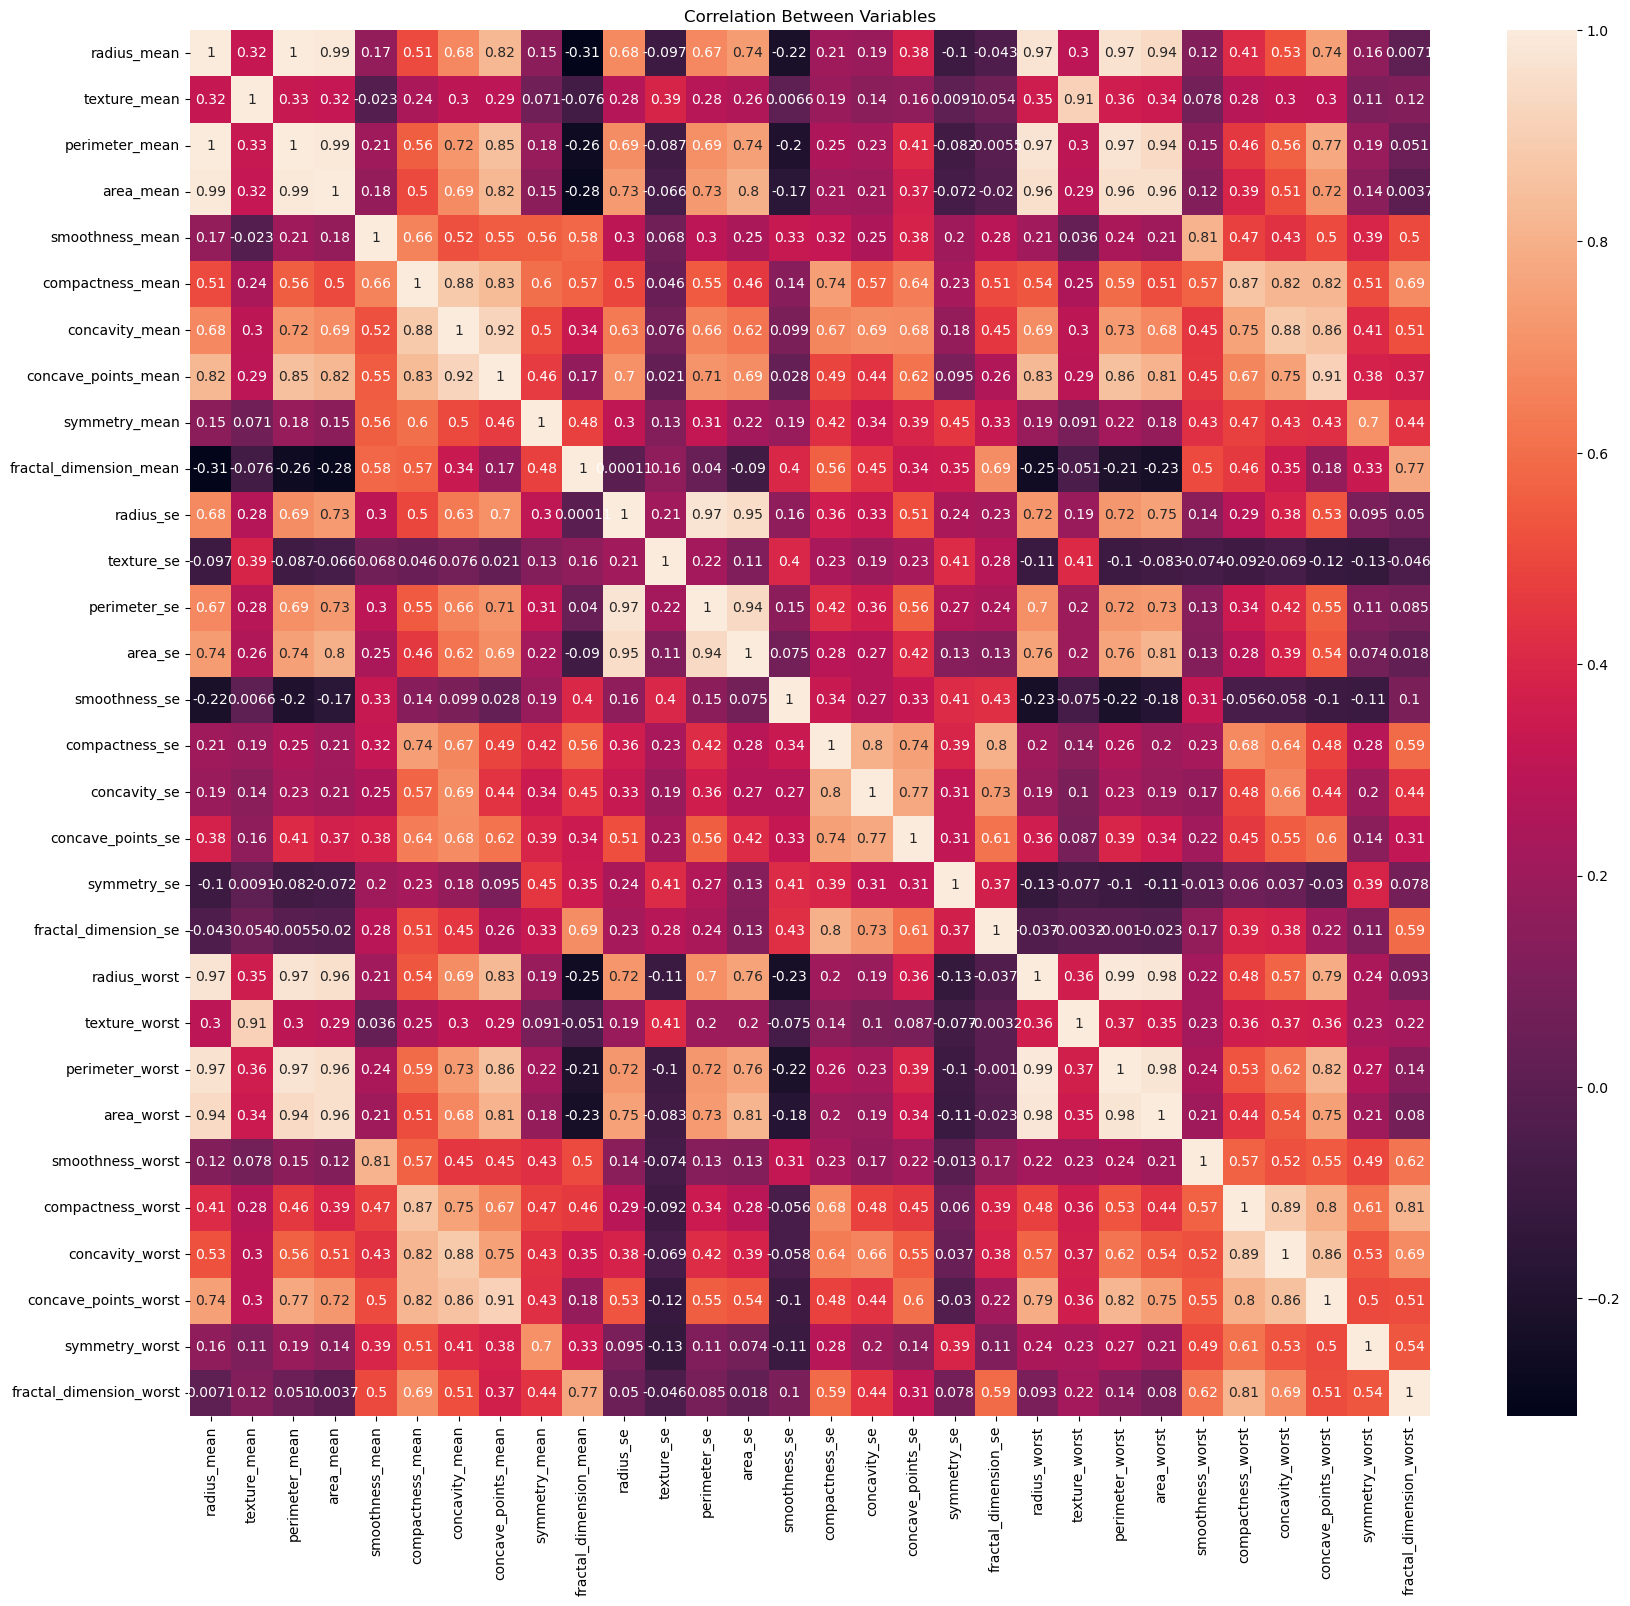

In [21]:
df_numeric = df.select_dtypes(include = [np.number]) #keep only numeric columns

plt.figure(figsize = (20,18))
plt.title('Correlation Between Variables')
sns.heatmap(data = df_numeric.corr(), annot = True)

<Axes: xlabel='diagnosis', ylabel='count'>

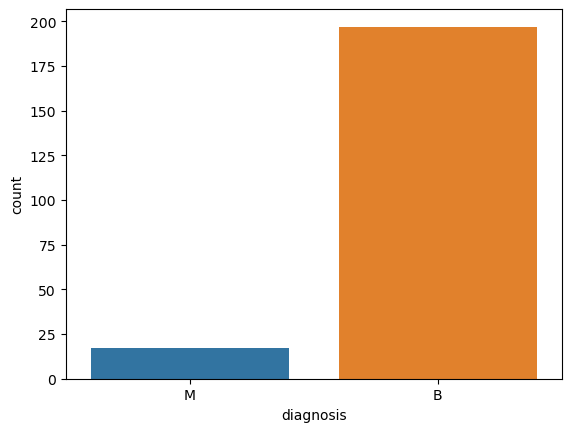

In [24]:
sns.countplot(x = 'diagnosis', data = df_cleaned)

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cleaned['diagnosis'] = le.fit_transform(df_cleaned['diagnosis'])

In [26]:
x = df_cleaned.drop(columns = 'diagnosis')
y = df_cleaned.diagnosis

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
(x_train.shape[0]/len(x)) * 100, (x_test.shape[0]/len(x)) * 100

(79.90654205607477, 20.093457943925234)

In [51]:
pip install --upgrade scikit-learn numpy 

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\ratih\anaconda3\lib\site-packages (1.3.0)
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/17/1c/ccdd103cfcc9435a18819856fbbe0c20b8fa60bfc3343580de4be13f0668/scikit_learn-1.5.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/1e/48/a9a4b538e28f854bfb62e1dea3c8fea12e90216a276c7777ae5345ff29a7/numpy-2.1.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------------------- ------ 51.2/60.8 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 803.2 kB/s eta 0:00:00
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.


In [52]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

c:\Users\Ratih\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [35]:
from sklearn.svm import SVC 
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print(confusion_matrix(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))
print(recall_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_knn))

[[41  0]
 [ 0  2]]
1.0
1.0
1.0


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print(confusion_matrix(y_test, y_pred_svm))
print(accuracy_score(y_test, y_pred_svm))
print(recall_score(y_test, y_pred_svm))
print(precision_score(y_test, y_pred_svm))

[[41  0]
 [ 1  1]]
0.9767441860465116
0.5
1.0


In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print(confusion_matrix(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt))
print(recall_score(y_test, y_pred_dt))
print(precision_score(y_test, y_pred_dt))

[[38  3]
 [ 0  2]]
0.9302325581395349
1.0
0.4


<Axes: >

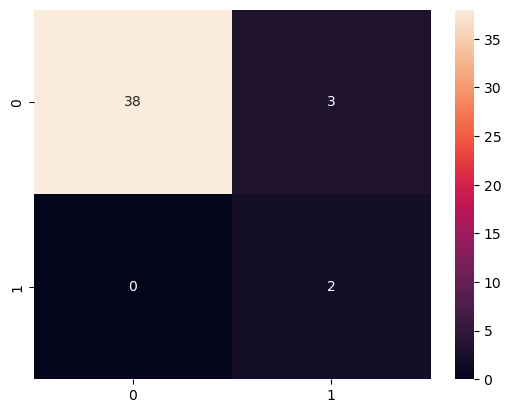

In [56]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot = True, fmt = 'd')